<center><h1><b>5주차 ✅ EDA</b></h1></center>

---
----

<center><h2><b>데이터 가져오기</b></h2></center>


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# import cufflinks as cf

In [4]:
pd.set_option('display.max_columns', None)

In [16]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin":
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(colab)
        !apt-get install fonts-nanum - qq > /dev/null
        !fc-cache - fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont

        font_family = "NanumBarunGothic"
    return font_family


# style 설정은 꼭 폰트설정 위에서 합니다.
# style 에 폰트 설정이 들어있으면 한글폰트가 초기화 되어 한글이 깨집니다.
plt.style.use("seaborn")
# 폰트설정
plt.rc("font", family=get_font_family())

# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'


In [47]:
# 폐기물 수 19,20년도 데이터 가져오기
waste_raw = pd.read_csv('output/waste/waste_1920.csv')
waste_raw.head(2)

,시도명,배출방식,19년_사업장배출시설폐기물,19년_사업장생활폐기물수,19년_생활폐기물수,20년_사업장생활폐기물수,20년_사업장배출시설폐기물,20년_생활폐기물수
0,강원도,기타,217.2,84.2,16.4,50140.8,98363.4,6586.4
1,강원도,매립,628.8,115.4,1127.6,32602.6,245895.4,369244.6


In [55]:
# 토양오염 값 기술통계 19,20년도 데이터 가져오기
soil_raw = pd.read_csv('output/soil/soil_1920.csv')
soil_raw.head(2)

,시도명,항목,19년_토양오염,20년_토양오염
0,강원도,As,7.012837,2.878578
1,강원도,Cd,0.112558,0.070000


In [49]:
# 수질오염 값 (중금속) 기술통계 19,20년도 데이터 가져오기
water_raw = pd.read_csv('output/water/water_metal_sido_1920.csv')
water_raw.head(2)

,시도명,항목,2019,2020
0,서울특별시,Cr6+,0.000000,0.000000
1,서울특별시,Pb,0.000232,0.000245


In [50]:
# 대기오염 값 기술통게 19,20년도 데이터 가져오기
air_raw = pd.read_csv('output/air/air_1920.csv')
air_raw.head(2)

,시도명,항목,월,2019,2020
0,강원도,미세먼지 PM10,1,55.769231,32.894737
1,강원도,미세먼지 PM2.5,1,31.923077,22.631579


---
----

<center><h2><b>?</b></h2></center>


In [59]:
# 토양/수질 오염 데이터 [시도명, 항목] 기준 inner merge 하기
sl_wt_m = pd.merge(water_raw, soil_raw, )
sl_wt_m = sl_wt_m.rename(columns={'2019': '19년_대기오염', '2020': '20년_대기오염'})
sl_wt_m['항목'].unique()

array(['Cr6+', 'Pb', 'As', 'Hg', 'Cd'], dtype=object)

In [61]:
sl_wt_m.head()

,시도명,항목,19년_대기오염,20년_대기오염,19년_토양오염,20년_토양오염
0,서울특별시,Cr6+,0.000000e+00,0.000000e+00,0.028000,0.054294
1,서울특별시,Pb,2.315952e-04,2.454286e-04,46.955666,37.114723
2,서울특별시,As,9.016667e-05,1.106190e-04,6.114300,5.482607
3,서울특별시,Hg,1.214286e-07,1.559524e-07,0.102233,0.121748
4,서울특별시,Cd,4.547619e-06,1.028571e-05,0.299033,0.307025


In [62]:
sl_wt_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 0 to 119
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   시도명       120 non-null    object 
 1   항목        120 non-null    object 
 2   19년_대기오염  120 non-null    float64
 3   20년_대기오염  120 non-null    float64
 4   19년_토양오염  120 non-null    float64
 5   20년_토양오염  120 non-null    float64
dtypes: float64(4), object(2)
memory usage: 6.6+ KB


In [67]:
sl_wt_m.describe().round(6)

,19년_대기오염,20년_대기오염,19년_토양오염,20년_토양오염
count,120.000000,120.000000,120.000000,120.000000
mean,0.000026,0.000036,7.431367,6.884372
std,0.000102,0.000175,13.362615,12.036631
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.047600,0.030406
50%,0.000000,0.000000,0.340000,0.377803
75%,0.000000,0.000001,6.534534,6.933090
max,0.001000,0.001838,79.709000,47.883330


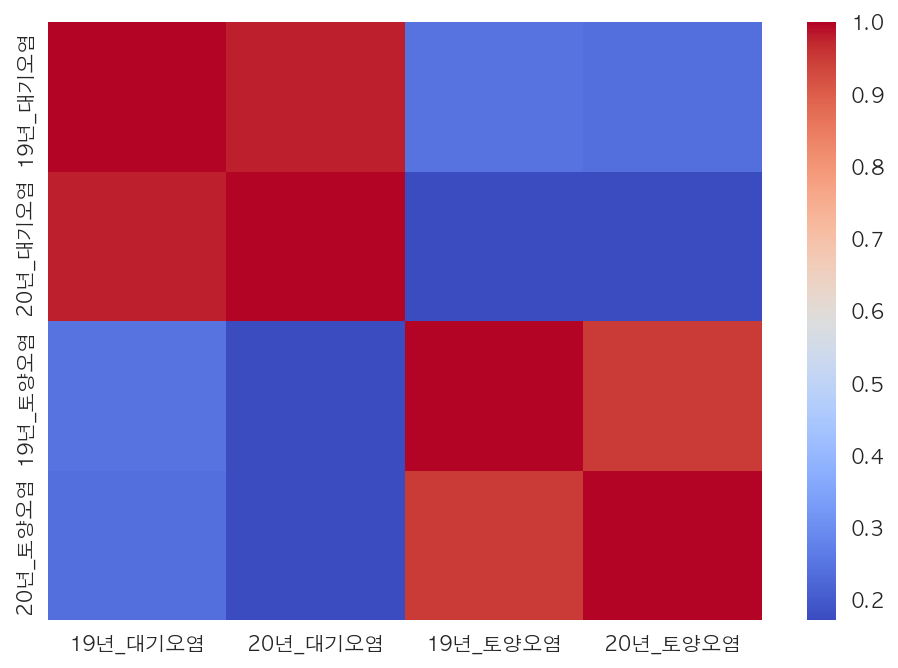

In [76]:
# sns.heatmap(sl_wt_m.groupby(by=['시도명']).mean())
_ = sns.heatmap(sl_wt_m.corr(), cmap='coolwarm')

In [134]:
sl_wt_m['시도명'].unique()

array(['서울특별시', '인천광역시', '경기도', '충청북도', '강원도', '전라북도', '대전광역시', '충청남도',
       '부산광역시', '대구광역시', '경상북도', '경상남도', '전라남도', '광주광역시', '울산광역시'],
      dtype=object)

In [85]:
waste_sido_sum = waste_raw.groupby('시도명', as_index=False).sum()
waste_sido_sum.head(2)

,시도명,19년_사업장배출시설폐기물,19년_사업장생활폐기물수,19년_생활폐기물수,20년_사업장생활폐기물수,20년_사업장배출시설폐기물,20년_생활폐기물수
0,강원도,12341.6,769.2,3732.6,314959.0,4502221.4,1335367.0
1,경기도,52375.8,7306.0,19087.8,3332756.0,22765462.8,7803032.8


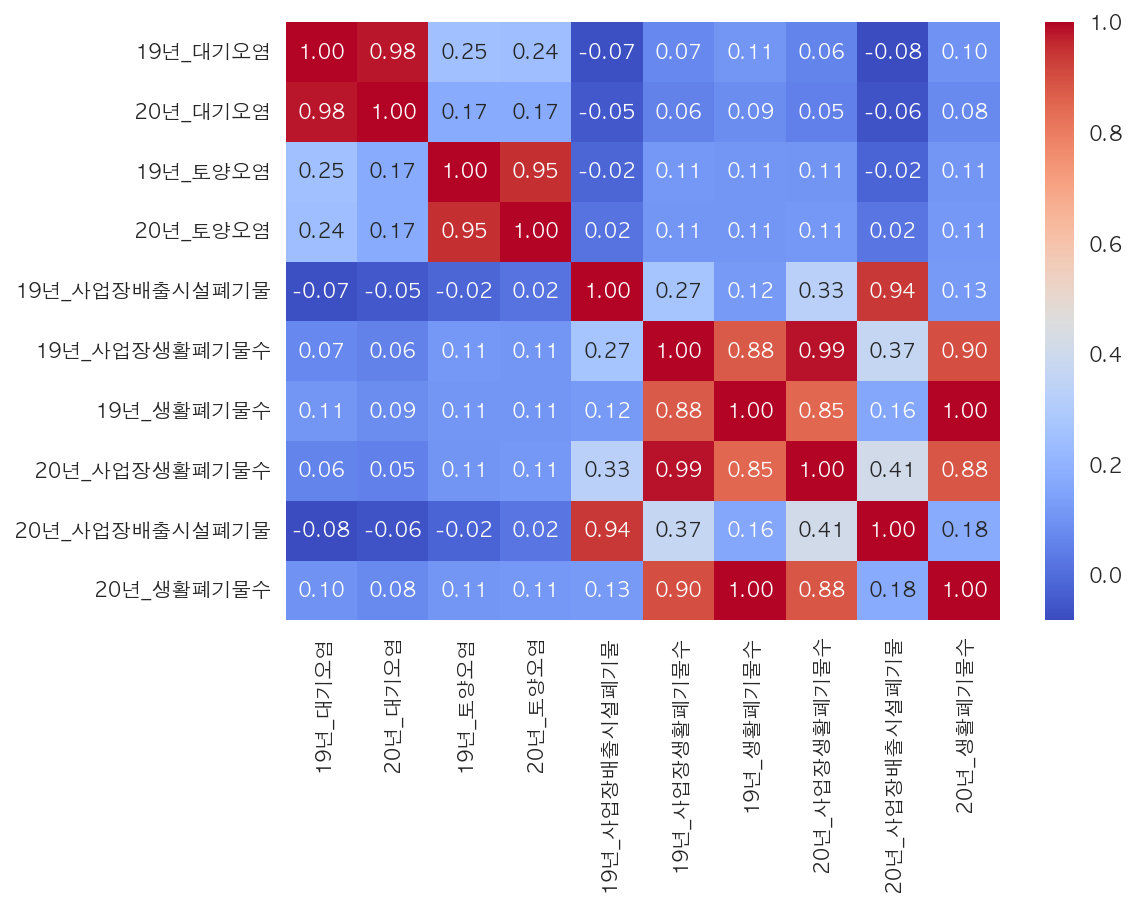

In [94]:
_ = sns.heatmap(pd.merge(sl_wt_m, waste_sido_sum).corr(),
                cmap='coolwarm', annot=True, fmt=".2f")


In [156]:
waste_sum = waste_sido_sum.groupby('시도명').sum().sum(axis=1)
waste_sum = waste_sum.to_frame(name='폐기물수')
waste_sum

,폐기물수
시도명,
강원도,6169390.8
경기도,33980021.2
경상남도,13336099.8
경상북도,31603066.4
광주광역시,1743121.2
대구광역시,4087315.4
대전광역시,2562944.0
부산광역시,5754711.6
서울특별시,8795605.4


In [157]:
sl_wt_g = sl_wt_m.groupby(by=['시도명'], ).mean()
sl_wt_g.head()

,19년_대기오염,20년_대기오염,19년_토양오염,20년_토양오염
시도명,,,,
강원도,0.000041,0.000046,5.278242,4.841484
경기도,0.000033,0.000041,11.502827,10.935690
경상남도,0.000108,0.000198,6.973231,7.624764
경상북도,0.000008,0.000010,5.584171,5.550103
광주광역시,0.000000,0.000000,4.447042,3.900600


In [159]:
w_sl_wt_m = pd.merge(sl_wt_g, waste_sum, left_index=True, right_index=True, how='left')
w_sl_wt_m

,19년_대기오염,20년_대기오염,19년_토양오염,20년_토양오염,폐기물수
시도명,,,,,
강원도,0.000041,4.627115e-05,5.278242,4.841484,6169390.8
경기도,0.000033,4.081560e-05,11.502827,10.935690,33980021.2
경상남도,0.000108,1.984556e-04,6.973231,7.624764,13336099.8
경상북도,0.000008,9.622222e-06,5.584171,5.550103,31603066.4
광주광역시,0.000000,0.000000e+00,4.447042,3.900600,1743121.2
대구광역시,0.000016,1.924444e-05,3.994479,3.969104,4087315.4
대전광역시,0.000000,1.696667e-07,7.184441,7.268441,2562944.0
부산광역시,0.000016,1.924444e-05,12.506409,11.437012,5754711.6
서울특별시,0.000065,7.329786e-05,10.699847,8.616080,8795605.4


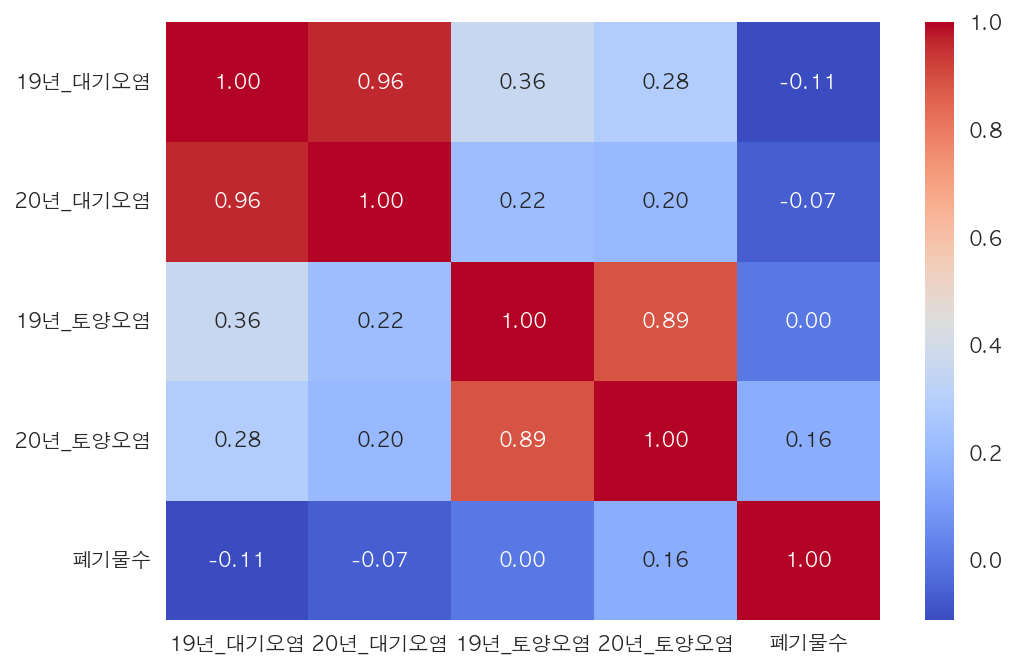

In [161]:
_ = sns.heatmap(w_sl_wt_m.corr(), annot=True, cmap='coolwarm', fmt='.2f')